<a href="https://colab.research.google.com/github/data2450/KPMG-data-full-analysis/blob/main/kpmg_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
url='https://raw.githubusercontent.com/data2450/KPMG-data-full-analysis/main/kpmg_new.csv'

In [3]:
fulldata=pd.read_csv(url)

In [4]:
fulldata.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,constant_d,Recency
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,66.0,94,86,2017-12-23,FALSE,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,2005-05-10,110.56,2017-12-30,7 days
1,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,66.0,3765,38,2017-04-06,TRUE,Approved,Solex,Standard,medium,medium,1577.53,826.51,2008-03-19,751.02,2017-12-30,268 days
2,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,66.0,5157,47,2017-05-11,TRUE,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-21,189.28,2017-12-30,233 days
3,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,66.0,9785,72,2017-01-05,FALSE,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,2003-09-09,90.10,2017-12-30,359 days
4,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,66.0,13424,2,2017-02-21,FALSE,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-09,17.87,2017-12-30,312 days


In [5]:
fulldata.drop(fulldata.index[fulldata['order_status']=='Cancelled'],inplace=True)

In [6]:
fulldata.order_status.value_counts()

Approved    19622
Name: order_status, dtype: int64

In [7]:
fulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19622 entries, 0 to 19799
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          19622 non-null  int64  
 1   first_name                           19622 non-null  object 
 2   last_name                            19622 non-null  object 
 3   gender                               19622 non-null  object 
 4   past_3_years_bike_related_purchases  19622 non-null  int64  
 5   DOB                                  19186 non-null  object 
 6   job_title                            19622 non-null  object 
 7   job_industry_category                19622 non-null  object 
 8   wealth_segment                       19622 non-null  object 
 9   deceased_indicator                   19622 non-null  object 
 10  owns_car                             19622 non-null  object 
 11  tenure                      

In [8]:
fulldata.customer_id.nunique()

3492

In [9]:
fulldata.transaction_id.nunique()

19622

In [63]:
pd.pivot_table(fulldata, index = 'product_class', columns = 'product_size', values = 'customer_id' ,aggfunc ='count')

product_size,large,medium,small
product_class,,,
high,570.0,2032.0,376.0
low,NaN,2229.0,717.0
medium,3368.0,8612.0,1718.0


In [62]:
pd.pivot_table(fulldata, index = 'gender', columns = 'product_size', values = 'customer_id' ,aggfunc ='count')

product_size,large,medium,small
gender,,,
Female,1942,6480,1407
Male,1906,6110,1333
U,90,283,71


In [61]:
pd.pivot_table(fulldata, index = 'gender', columns = 'product_class', values = 'customer_id' ,aggfunc ='count')

product_class,high,low,medium
gender,,,
Female,1486,1472,6871
Male,1425,1420,6504
U,67,54,323


In [60]:
pd.pivot_table(fulldata, index = 'gender', columns = 'product_line', values = 'customer_id' ,aggfunc ='count')

product_line,Mountain,Road,Standard,Touring
gender,,,,
Female,216,1973,7056,584
Male,196,1865,6688,600
U,8,92,303,41


In [14]:
u=pd.pivot_table(fulldata, index = 'gender', columns = 'brand', values = 'customer_id' ,aggfunc ='count')

In [15]:
f=pd.pivot_table(fulldata, index = 'brand', columns = 'gender', values = 'customer_id' ,aggfunc ='count')

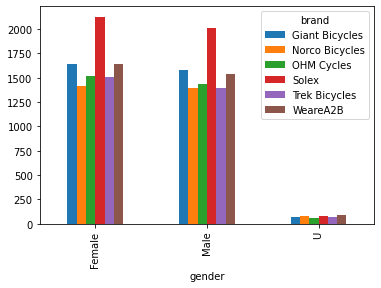

In [16]:
u.plot(kind="bar")

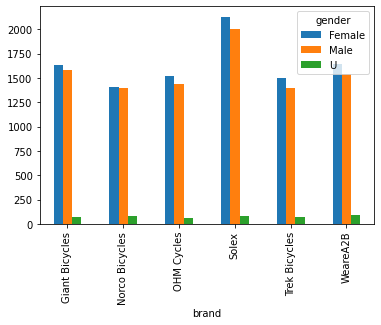

In [17]:
f.plot(kind="bar")

In [18]:
print(fulldata.customer_id.nunique())
fulldata.profit=fulldata.profit.round(0)
print(fulldata.profit)


3492
0        111.0
1        751.0
2        189.0
3         90.0
4         18.0
         ...  
19795    198.0
19796    827.0
19797    144.0
19798     15.0
19799    583.0
Name: profit, Length: 19622, dtype: float64


In [19]:
t=pd.DataFrame(fulldata.groupby('customer_id')['constant_d'].agg('count'))

In [20]:
t.reset_index(inplace=True)

In [21]:
t.columns=['customer_id','frequency']

In [22]:
t.sort_values(by=['frequency'],ascending=False).head(10)

,customer_id,frequency
2470,2476,14
2177,2183,14
1064,1068,14
1908,1913,13
1125,1129,13
1298,1302,13
3041,3048,13
1941,1946,13
2905,2912,13
1136,1140,13


In [23]:
r=pd.DataFrame(fulldata.groupby('product_id')['profit'].agg('sum'))
r.reset_index(inplace=True)
r.columns=['product_id','tot_profit']
g=r.sort_values(by=['tot_profit'],ascending=False)
g.head()

,product_id,tot_profit
3,3,596050.0
38,38,305438.0
57,57,281990.0
46,46,259260.0
89,89,246810.0


In [24]:
fulldata.profit=fulldata.profit.round(0)

y=pd.pivot_table(fulldata, index = 'product_id', values ='profit')
y.sort_values(by='profit',ascending=False).head()
y.reset_index(inplace=True)
y.columns=['product_id','profit']
y.profit=y.profit.round(0)
y.head()

,product_id,profit
0,0,89.0
1,1,523.0
2,2,27.0
3,3,1703.0
4,4,689.0


In [25]:
i=pd.DataFrame(fulldata.groupby('product_id')['profit'].agg('count'))
i.reset_index(inplace=True)
i.columns=['product_id','freq_product_id']
i.head()

,product_id,freq_product_id
0,0,1172
1,1,309
2,2,239
3,3,350
4,4,240


In [26]:
h=pd.merge(i,g)
k=pd.merge(h,y)

## lets look at the product id 
which is most purchased and which is giving more profit




In [27]:
print('max_purchase: ',k.freq_product_id.max())
print('product_id_for_max_purchase :',k.loc[k['freq_product_id'] == 1172,'product_id'].iloc[0])
print('min_purchase: ',k.freq_product_id.min())
print('product_id_for_min_purchase :',k.loc[k['freq_product_id'] == 121,'product_id'].iloc[0])
print('min_profit: ',k.profit.min())
print('product_id_with min_profit :',k.loc[k['profit'] ==27.0,'product_id'].iloc[0])
print('max_profit: ',k.profit.max())
print('product_id_with max_profit :',k.loc[k['profit'] ==1703.0,'product_id'].iloc[0])
print('min_tot_profit: ',k.tot_profit.min())
print('product_id_with min_tot_profit :',k.loc[k['tot_profit'] == 4856.0,'product_id'].iloc[0])
##maximum tot_profit is 596050.0 and product id is"3"

k.sort_values(by=['tot_profit'],ascending=False).head(10)

max_purchase:  1172
product_id_for_max_purchase : 0
min_purchase:  121
product_id_for_min_purchase : 47
min_profit:  27.0
product_id_with min_profit : 2
max_profit:  1703.0
product_id_with max_profit : 3
min_tot_profit:  4856.0
product_id_with min_tot_profit : 61


,product_id,freq_product_id,tot_profit,profit
3,3,350,596050.0,1703.0
38,38,266,305438.0,1148.0
57,57,173,281990.0,1630.0
46,46,196,259260.0,1323.0
89,89,192,246810.0,1285.0
63,63,175,236040.0,1349.0
12,12,221,235798.0,1067.0
54,54,194,235126.0,1212.0
37,37,152,234840.0,1545.0
10,10,188,232814.0,1238.0


In [28]:
t.shape

(3492, 2)

In [29]:
new_data=pd.merge(t,fulldata)

In [30]:
#fulldata=fulldata.drop('frequency',axis=1)

In [31]:
#fulldata['frequency1']=fulldata.constant_d.agg('count')

In [32]:
print(new_data.frequency.mean())
new_data.head()

6.557435531546224


,customer_id,frequency,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,constant_d,Recency
0,1,11,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,66.0,94,86,2017-12-23,FALSE,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,2005-05-10,111.0,2017-12-30,7 days
1,1,11,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,66.0,3765,38,2017-04-06,TRUE,Approved,Solex,Standard,medium,medium,1577.53,826.51,2008-03-19,751.0,2017-12-30,268 days
2,1,11,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,66.0,5157,47,2017-05-11,TRUE,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-21,189.0,2017-12-30,233 days
3,1,11,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,66.0,9785,72,2017-01-05,FALSE,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,2003-09-09,90.0,2017-12-30,359 days
4,1,11,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,66.0,13424,2,2017-02-21,FALSE,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-09,18.0,2017-12-30,312 days


In [33]:
print(new_data.agg({'transaction_date':[np.max,np.min]}))
new_data[new_data['product_id']==3].head()


     transaction_date
amax       2017-12-30
amin       2017-01-01


,customer_id,frequency,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,constant_d,Recency
39,8,10,Rod,Inder,Male,31,1962-03-30,Media Manager I,missing,Mass Customer,N,No,7.0,58.0,5321,3,2017-12-08,TRUE,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2003-07-21,1703.0,2017-12-30,22 days
47,8,10,Rod,Inder,Male,31,1962-03-30,Media Manager I,missing,Mass Customer,N,No,7.0,58.0,19844,3,2017-01-28,missing,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2003-07-21,1703.0,2017-12-30,336 days
88,16,5,Harlin,Parr,Male,38,1977-02-27,Media Manager IV,missing,Mass Customer,N,Yes,18.0,43.0,1405,3,2017-08-17,FALSE,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2001-11-25,1703.0,2017-12-30,135 days
111,20,4,Basile,Firth,Male,72,1980-08-13,Project Manager,Manufacturing,Mass Customer,N,No,11.0,40.0,18030,3,2017-06-11,FALSE,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2002-08-31,1703.0,2017-12-30,202 days
113,21,5,Mile,Cammocke,Male,74,1980-09-20,Safety Technician I,Manufacturing,Affluent Customer,N,Yes,16.0,40.0,4778,3,2017-10-22,FALSE,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,1703.0,2017-12-30,69 days


In [34]:
m=pd.DataFrame(fulldata.groupby('customer_id')['profit'].agg('sum'))
m.reset_index(inplace=True)
m.columns=['customer_id','sum_profit']
m.head()


,customer_id,sum_profit
0,1,3018.0
1,2,2226.0
2,3,3362.0
3,4,220.0
4,5,2395.0


In [35]:
new_data2=pd.merge(new_data,m)

In [36]:
print(new_data2.Recency.max())
new_data2.Recency.describe()
#min recency is "0"

99 days


count        19622
unique         364
top       134 days
freq            82
Name: Recency, dtype: object

In [37]:
new_data2.head()

,customer_id,frequency,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,constant_d,Recency,sum_profit
0,1,11,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,66.0,94,86,2017-12-23,FALSE,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,2005-05-10,111.0,2017-12-30,7 days,3018.0
1,1,11,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,66.0,3765,38,2017-04-06,TRUE,Approved,Solex,Standard,medium,medium,1577.53,826.51,2008-03-19,751.0,2017-12-30,268 days,3018.0
2,1,11,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,66.0,5157,47,2017-05-11,TRUE,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-21,189.0,2017-12-30,233 days,3018.0
3,1,11,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,66.0,9785,72,2017-01-05,FALSE,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,2003-09-09,90.0,2017-12-30,359 days,3018.0
4,1,11,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,66.0,13424,2,2017-02-21,FALSE,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-09,18.0,2017-12-30,312 days,3018.0


In [38]:
print(new_data2.customer_id.nunique())
new_data2.columns

3492


Index(['customer_id', 'frequency', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'age', 'transaction_id', 'product_id',
       'transaction_date', 'online_order', 'order_status', 'brand',
       'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date', 'profit', 'constant_d',
       'Recency', 'sum_profit'],
      dtype='object')

In [39]:
new_data2.sort_values('customer_id',inplace=True)
# making a bool series 
bool_series =new_data2["customer_id"].duplicated(keep = 'first')
# bool series 
bool_series 
# passing NOT of bool series to see unique values only 
data_u = new_data2[~bool_series]
# displaying data 
data_u.info() 
data_u 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3492 entries, 0 to 19619
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          3492 non-null   int64  
 1   frequency                            3492 non-null   int64  
 2   first_name                           3492 non-null   object 
 3   last_name                            3492 non-null   object 
 4   gender                               3492 non-null   object 
 5   past_3_years_bike_related_purchases  3492 non-null   int64  
 6   DOB                                  3416 non-null   object 
 7   job_title                            3492 non-null   object 
 8   job_industry_category                3492 non-null   object 
 9   wealth_segment                       3492 non-null   object 
 10  deceased_indicator                   3492 non-null   object 
 11  owns_car                     

,customer_id,frequency,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,constant_d,Recency,sum_profit
0,1,11,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,66.0,94,86,2017-12-23,FALSE,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,2005-05-10,111.0,2017-12-30,7 days,3018.0
11,2,3,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,39.0,2261,1,2017-05-04,TRUE,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,2011-08-29,449.0,2017-12-30,240 days,2226.0
19,3,8,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,66.0,15188,82,2017-03-24,FALSE,Approved,Norco Bicycles,Standard,high,medium,1148.64,689.18,2002-08-31,459.0,2017-12-30,281 days,3362.0
22,4,2,Talbot,missing,Male,33,1961-10-03,missing,IT,Mass Customer,N,No,7.0,59.0,12441,95,2017-04-03,FALSE,Approved,Giant Bicycles,Standard,medium,large,569.56,528.43,2003-09-10,41.0,2017-12-30,271 days,220.0
29,5,6,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,missing,Affluent Customer,N,Yes,8.0,43.0,19993,13,2017-04-28,FALSE,Approved,Solex,Standard,medium,medium,1163.89,589.27,2009-03-08,575.0,2017-12-30,246 days,2395.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19596,3496,4,Danya,Burnyeat,Male,99,1986-04-25,Editor,Manufacturing,Mass Customer,N,Yes,19.0,34.0,3479,73,2017-04-18,TRUE,Approved,Solex,Standard,medium,medium,1945.43,333.18,2014-10-10,1612.0,2017-12-30,256 days,2046.0
19602,3497,3,Thia,O'Day,Female,73,1986-05-03,Administrative Assistant IV,Manufacturing,Affluent Customer,N,Yes,18.0,34.0,10493,78,2017-09-12,FALSE,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2004-07-25,1056.0,2017-12-30,109 days,1649.0
19603,3498,6,Lois,Abrahim,Female,28,1995-11-02,missing,Manufacturing,Mass Customer,N,No,5.0,24.0,1244,50,2017-02-21,TRUE,Approved,WeareA2B,Standard,medium,small,175.89,131.92,2003-02-16,44.0,2017-12-30,312 days,3147.0
19611,3499,7,Shelton,Tewkesberrie,Male,29,1979-06-17,missing,Manufacturing,Mass Customer,N,Yes,7.0,41.0,2794,62,2017-01-12,FALSE,Approved,Solex,Standard,medium,medium,478.16,298.72,1998-12-17,179.0,2017-12-30,352 days,4954.0


Female    1759
Male      1656
U           77
Name: gender, dtype: int64


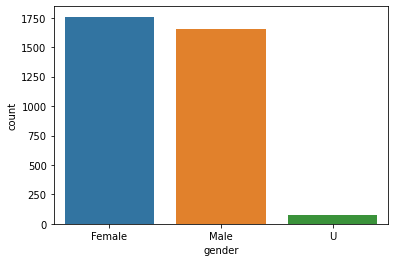

In [40]:
print(data_u.gender.value_counts())
sns.countplot(x='gender',data=data_u)



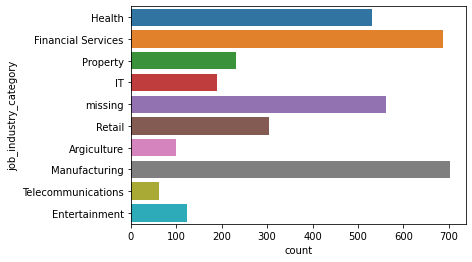

In [41]:
sns.countplot(y='job_industry_category',data=data_u)

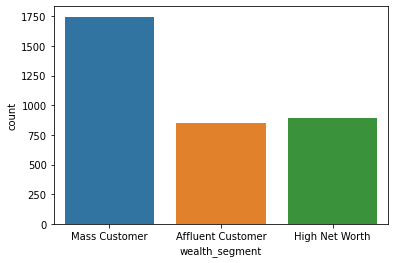

In [42]:
sns.countplot(x='wealth_segment',data=data_u)

In [49]:
#frequency columns tells the n.o of purchases did in 2017 year,
#in 2017 females are done 
print(pd.DataFrame(data_u.groupby('gender')['frequency'].agg('sum')))

print(pd.DataFrame(data_u.groupby('gender')['frequency'].agg('sum')/data_u.gender.value_counts()))
#all the female coustmers are more but the coustmers belong to u category has a high probablity to purchase more than others comparing with the n.o of coustmers

        frequency
gender           
Female       9829
Male         9349
U             444
               0
gender          
Female  5.587834
Male    5.645531
U       5.766234


In [53]:
print(pd.DataFrame(data_u.groupby('wealth_segment')['frequency'].agg('sum')))


pd.DataFrame(data_u.groupby('wealth_segment')['frequency'].agg('sum')/data_u.wealth_segment.value_counts())

                   frequency
wealth_segment              
Affluent Customer       4760
High Net Worth          5007
Mass Customer           9855


,0
Affluent Customer,5.600000
High Net Worth,5.594413
Mass Customer,5.641099


In [55]:
sales = pd.DataFrame(data_u.groupby(['gender', 'wealth_segment']).frequency.sum())
sales.rename(columns = {'frequency': 'tot_purchase_in2017'}, inplace = True)
sales.sort_values(by = 'tot_purchase_in2017', ascending = False, inplace = True)
sales

tot_purchase_in2017
gender wealth_segment                        
Female Mass Customer                     5039
Male   Mass Customer                     4575
Female High Net Worth                    2470
Male   High Net Worth                    2424
       Affluent Customer                 2350
Female Affluent Customer                 2320
U      Mass Customer                      241
       High Net Worth                     113
       Affluent Customer                   90

In [57]:
sales1 = pd.DataFrame(data_u.groupby(['gender', 'wealth_segment']).past_3_years_bike_related_purchases.sum())
sales1.sort_values(by = 'past_3_years_bike_related_purchases', ascending = False, inplace = True)
sales1

past_3_years_bike_related_purchases
gender wealth_segment                                        
Female Mass Customer                                    43323
Male   Mass Customer                                    41401
Female High Net Worth                                   21389
Male   Affluent Customer                                20582
       High Net Worth                                   20513
Female Affluent Customer                                20075
U      Mass Customer                                     1866
       High Net Worth                                     803
       Affluent Customer                                  488

In [58]:
sales2 = pd.DataFrame(data_u.groupby(['gender', 'wealth_segment']).sum_profit.sum())
sales2.sort_values(by = 'sum_profit', ascending = False, inplace = True)
sales2

sum_profit
gender wealth_segment               
Female Mass Customer       2738660.0
Male   Mass Customer       2544251.0
Female High Net Worth      1343431.0
Male   High Net Worth      1339546.0
Female Affluent Customer   1298275.0
Male   Affluent Customer   1296274.0
U      Mass Customer        150012.0
       High Net Worth        64213.0
       Affluent Customer     55994.0

In [59]:
sales4 = pd.DataFrame(data_u.groupby(['gender', 'wealth_segment','job_industry_category']).frequency.sum())
sales4.rename(columns = {'frequency': 'tot_purchase_in2017'}, inplace = True)
sales4.sort_values(by = 'tot_purchase_in2017', ascending = False, inplace = True)
sales4

tot_purchase_in2017
gender wealth_segment    job_industry_category                     
Female Mass Customer     Manufacturing                         1052
Male   Mass Customer     Manufacturing                          933
                         Financial Services                     927
Female Mass Customer     Financial Services                     904
                         missing                                904
...                                                             ...
U      High Net Worth    Financial Services                      10
       Affluent Customer Health                                   7
       High Net Worth    Health                                   5
       Mass Customer     Manufacturing                            4
       Affluent Customer Financial Services                       3

[71 rows x 1 columns]